# Heat Transfer 1D code for unsteady heat conduction with variable K and C

Press ctrl+F9 to run all at once

Importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Choose the approprate TPS material: Here I have choosen **Boron Carbide**

Melting point=**2350k**


Variation of thermal conductivity and specific heat capacity with temperature for Boron carbide

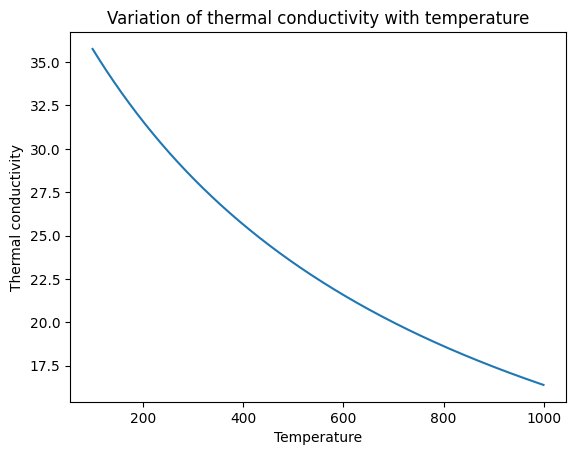

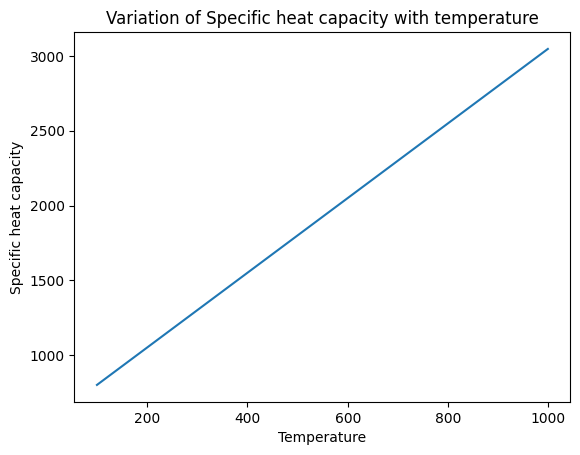

In [ ]:
Tarr=[]
karr=[]
Carr=[]
T=100
for i in range(900):
    k=1/(3.676*10**(-5)*T+2.429*10**(-2))
    C=1800+2.5*(T-500)
    Tarr.append(T)
    karr.append(k)
    Carr.append(C)
    T=T+1
plt.plot(Tarr,karr)
plt.xlabel('Temperature')
plt.ylabel('Thermal conductivity')
plt.title('Variation of thermal conductivity with temperature')
plt.show()
plt.plot(Tarr,Carr)
plt.xlabel('Temperature')
plt.ylabel('Specific heat capacity')
plt.title('Variation of Specific heat capacity with temperature')
plt.show()

Material Properties

In [ ]:
L = 0.258 # thickness of TPS (m)
k = 28.31 # thermal conductivity (W/mK) at 300k
rho = 2520 # density of rod (kg/m^3)
C =1300  # specific heat capacity of rod (J/kgK) at 300k
alpha = k / (rho * C)  # thermal diffusivity (m^2/s)
A=1 #area in meter sqr (m^2)
si=5.67*10**(-8)
print("The thermal diffusivity is %f m^2/s"%alpha)
w=rho*L
print("Weigtht per sqr area is %f Kg/m^2"%w)

The thermal diffusivity is 0.000009 m^2/s
Weigtht per sqr area is 650.160000 Kg/m^2


To turn **ON** Radiation put E=0.9, To turn it **OFF** put E=0.0

In [ ]:
E=0.9 #Emissivity of surface

Initializing the problem

In [ ]:
n=9 #number of elements
# Define time and space step sizes
dx = L/n # spatial step size (m)
dt =1.61 # time step size (s)

Check whether the problem is stable

In [ ]:
s=alpha*dt/dx**2
print("s = %f"%s)

s = 0.016930


If **s<=0.5 stable**,  if not try to decrease dt or decrease n accordingly.

Initilizing the variables

In [ ]:
m=int(720/dt)#Number of time instances
qarr=[] # to store heat flux wrt time
tarr=[] # to store time step data
Tn=np.ones((n+2,1))*300 # initial temp array
Tn1=np.zeros((n+2,1)) # final temp array
Tvst=np.zeros((n+2,m+1)) # all temp array for all time instances

Code for solving problem

In [ ]:
t=0 # initializing time for loop
l1=1 #initilizing increment step for 550<t<640
for l in range (0,m+1):
    if t<=200:
        q=2*10**5+l*dt*(1*10**6-2*10**5)/200 #Heat flux (j/m^2)
    elif t<=550:
        q=1*10**6
    elif t<=650:
        q=1*10**6-l1*dt*(1*10**6-3*10**5)/(650-550)
        l1=l1+1
    else:
        q=3*10**5
    k=1/(3.676*10**(-5)*Tn[0,0]+2.429*10**(-2)) # variation of K with time
    C=1800+2.5*(Tn[0,0]-500)
    P=k*A/dx # to simplify the matrix calculation
    Q=rho*C*A*dx/dt # to simplify the matix calc


    Tn1[0,0]=((q-E*si*(Tn[0,0])**4)*A+P*(Tn[1,0]-Tn[0,0]))*2/Q+Tn[0,0]


    for i in range (1,n+1):
        k=1/(3.676*10**(-5)*Tn[i,0]+2.429*10**(-2))
        C=1800+2.5*(Tn[i,0]-500)
        P=k*A/dx # to simplify the matrix calculation
        Q=rho*C*A*dx/dt # to simplify the matix calc

        Tn1[i,0]=(P*Tn[i-1,0]+(Q-2*P)*Tn[i,0]+P*Tn[i+1,0])/Q
    k=1/(3.676*10**(-5)*Tn[-1,0]+2.429*10**(-2))
    C=1800+2.5*(Tn[-1,0]-500)
    P=k*A/dx # to simplify the matrix calculation
    Q=rho*C*A*dx/dt # to simplify the matix calc
    Tn1[-1,0]=(P*Tn[-2,0]+(Q/2-P)*Tn[-1,0])*2/Q

    Tvst[:,l]=Tn[:,0]
    Tn=Tn1
    tarr.append(t)
    #print("%f / 720" %t)#For estimating run time of program(if you want uncomment it by removing # infront of print function)
    t=t+dt
    qarr.append(q)

**Printing the values of Max Temperature at the surface of the TPS and at the bottom of the TPS close to the protected surface**

In [ ]:
print("Max Temperature at the surface of the TPS is %fk " %max(Tvst[0,:]))
print("Max Temperature at the bottom surface of the TPS is %fk "%max(Tvst[-1,:]))

Max Temperature at the surface of the TPS is 1861.856423k 
Max Temperature at the bottom surface of the TPS is 308.590801k 


Plotting Heat flux vs time graph

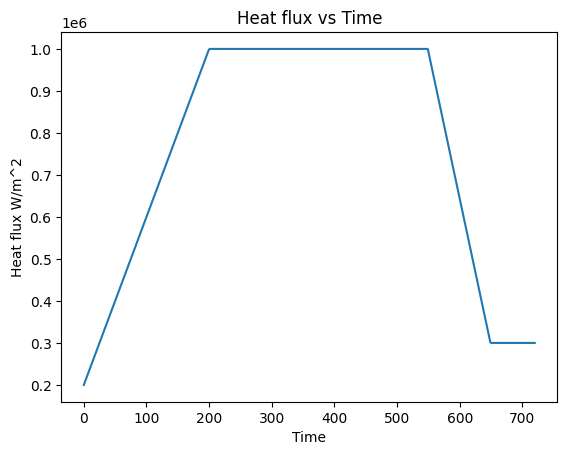

In [ ]:
plt.plot(tarr,qarr)
plt.xlabel('Time')
plt.ylabel('Heat flux W/m^2')
plt.title('Heat flux vs Time')
plt.show()

Color plotting Temperature at locations vs Time

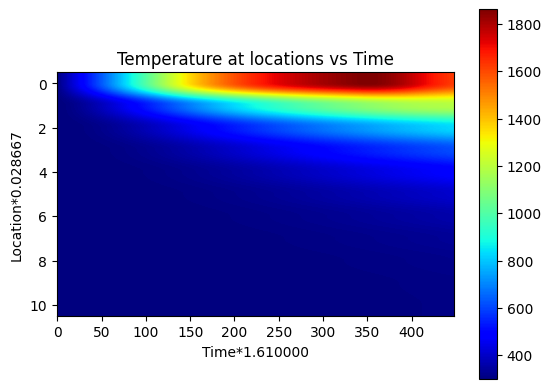

In [ ]:
a= 25 # aspect ratio for T at location vs time plot
plt.imshow(Tvst, cmap='jet',aspect=a)
plt.colorbar()
plt.xlabel('Time*%f'%dt)
plt.ylabel('Location*%f' %dx)
plt.title('Temperature at locations vs Time')
plt.show()

 Temperature variation with time at the exposed end at any y location

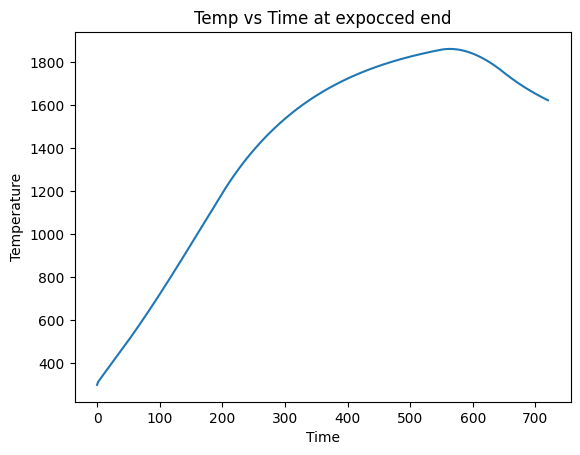

In [ ]:
t1=np.linspace(0,720,m+1)

plt.plot(t1,Tvst[0,:])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temp vs Time at expocced end')
plt.show()

Temperature variation with time at the back end at any y location

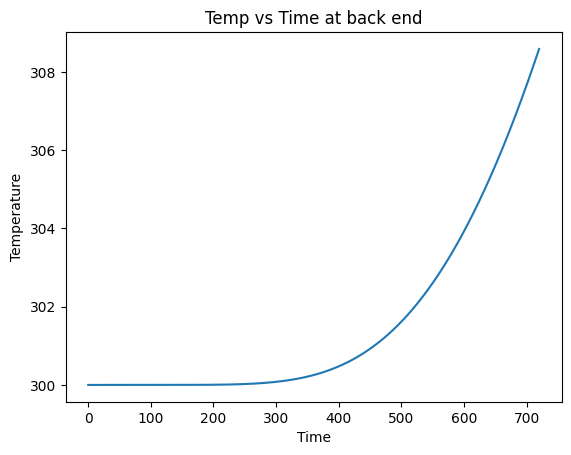

In [ ]:
plt.plot(t1,Tvst[n+1,:])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temp vs Time at back end')
plt.show()

 Temperature distribution through the TPS material along x coordinate at any y
location at the following instants: 100 s, 200 s, 300, 450, 550, 650, 720 s.

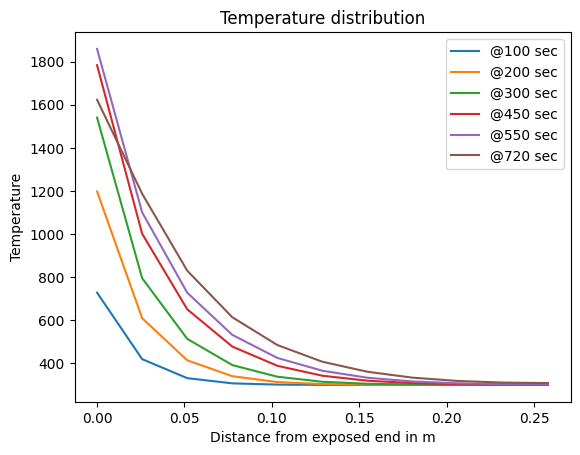

In [ ]:
x1=np.linspace(0,L,n+2)
plt.plot(x1,Tvst[:,int(m*100/720+1)])
plt.plot(x1,Tvst[:,int(m*200/720+1)])
plt.plot(x1,Tvst[:,int(m*300/720+1)])
plt.plot(x1,Tvst[:,int(m*450/720+1)])
plt.plot(x1,Tvst[:,int(m*550/720+1)])
plt.plot(x1,Tvst[:,-1])
plt.legend(['@100 sec','@200 sec','@300 sec','@450 sec','@550 sec','@720 sec'])
plt.xlabel('Distance from exposed end in m')
plt.ylabel('Temperature')
plt.title('Temperature distribution')
plt.show()